# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [19]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
import numpy as np
import warnings

# Setup
warnings.filterwarnings("ignore")

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [3]:
# Read data

df = pd.read_csv('sub_1.csv')
df

,Unnamed: 0,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746,1746,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874
1747,1747,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738
1748,1748,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740
1749,1749,1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441


Examine the data using the `head` function.

In [4]:
df.head()

,Unnamed: 0,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [5]:
df.isna().sum()

Unnamed: 0            0
attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [6]:
df.shape

(1751, 13)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [7]:

date_index= pd.date_range('01/01/2018 00:00:00',  periods=len(df.index),freq='S')
df.index = date_index
df

,Unnamed: 0,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 00:29:06,1746,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874
2018-01-01 00:29:07,1747,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738
2018-01-01 00:29:08,1748,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740
2018-01-01 00:29:09,1749,1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441


Assign the time series index to the dataframe's index.

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](./images/tsa_decompose.png)

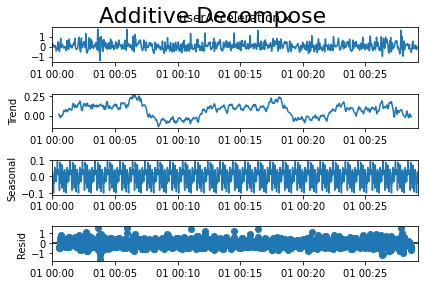

In [8]:
import statsmodels.api as sm

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Additive Decomposition
result_add = seasonal_decompose(df['userAcceleration.x'], model='additive', period= 60)

fig = result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show(fig)


Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

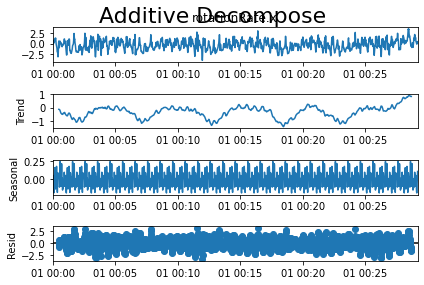

In [9]:

# Additive Decomposition
result_add = seasonal_decompose(df['rotationRate.x'], model='additive', period= 60)

fig2 = result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show(fig2)

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`.

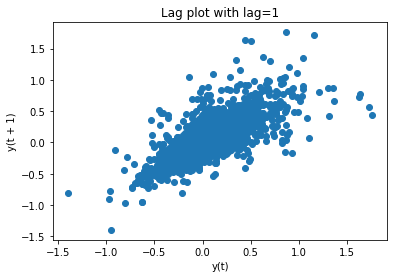

In [10]:
# Draw a lag plot
pd.plotting.lag_plot(df['userAcceleration.x'])
plt.title("Lag plot with lag=1")
plt.show(block=True)

Create a lag plot for `rotationRate.x`

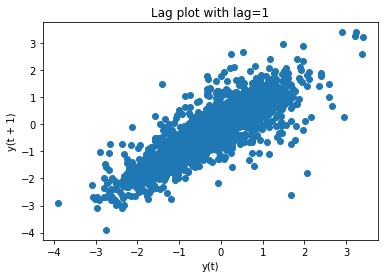

In [11]:
# Draw a lag plot
pd.plotting.lag_plot(df['rotationRate.x'])
plt.title("Lag plot with lag=1")
plt.show(block=True)

What are your conclusions from both visualizations?

```Comments:``` Autocorrelation in time series means that the series is linearly related to a lagged version of itself. For features 'rotationRate.x' and 'userAcceleration.x', the observations at time *t* have a positive linear correlation with the observations at time *t+1*. One of the assumptions of regression analysis is that the data has no autocorrelation. If we try to do a regression analysis on data with autocorrelation, then our analysis will be misleading.

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [12]:
# Ho: userAcceleration.x is not stationary
# Ha: userAcceleration.x is stationary


from statsmodels.tsa.stattools import adfuller, kpss
# ADF Test
result = adfuller(df['userAcceleration.x'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -17.957994086169762
p-value: 2.823439483037483e-30
Critical Values:
   1%, -3.434100824760071
Critical Values:
   5%, -2.863196780129223
Critical Values:
   10%, -2.5676520210882936


In [13]:
# Ho: userAcceleration.x is not stationary
# Ha: userAcceleration.x is stationary


from statsmodels.tsa.stattools import adfuller, kpss
# ADF Test
result = adfuller(df['rotationRate.x'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -5.269860625086411
p-value: 6.3202303359124956e-06
Critical Values:
   1%, -3.4341465551936534
Critical Values:
   5%, -2.863216966926812
Critical Values:
   10%, -2.567662770090317


What are your conclusions from this test?

In both cases here, p-value is significantly lower than 5% which implies we reject H0:

In other words, both times series here are stationary.


In [23]:
df.shape

(1751, 13)

```Comments:``` ARMA models work on the assumption that the time series is stationary. Stationarity means that the statistical properties of a process generating a time series do not change over time. It does not mean that the series does not change over time, just that the way it changes does not itself change over time. In both cases, we can reject the null hypothesis that the time series is not stationary, so we can create an ARMA model.

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [41]:
from statsmodels.tsa.arima.model import ARIMA
# ARMA of order (p,q)
# p: order of the autoregressive model (AR).
# q: order of the moving average model (MA).

train = df['userAcceleration.x'].head(1741)
train.tail(10)

2018-01-01 00:28:51    0.059688
2018-01-01 00:28:52    0.131804
2018-01-01 00:28:53   -0.151525
2018-01-01 00:28:54   -0.071375
2018-01-01 00:28:55   -0.162607
2018-01-01 00:28:56   -0.191617
2018-01-01 00:28:57   -0.081173
2018-01-01 00:28:58    0.033395
2018-01-01 00:28:59    0.028120
2018-01-01 00:29:00    0.140211
Freq: S, Name: userAcceleration.x, dtype: float64

In [25]:
test = df['userAcceleration.x'].tail(10)
test

2018-01-01 00:29:01    0.149749
2018-01-01 00:29:02    0.038461
2018-01-01 00:29:03   -0.169175
2018-01-01 00:29:04   -0.300361
2018-01-01 00:29:05   -0.270174
2018-01-01 00:29:06   -0.268367
2018-01-01 00:29:07   -0.102444
2018-01-01 00:29:08   -0.085590
2018-01-01 00:29:09   -0.048105
2018-01-01 00:29:10   -0.065011
Freq: S, Name: userAcceleration.x, dtype: float64

In [43]:
model = ARIMA(train, order=(2,0,1))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:     userAcceleration.x   No. Observations:                 1741
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 373.401
Date:                Tue, 29 Mar 2022   AIC                           -736.803
Time:                        11:40:13   BIC                           -709.492
Sample:                    01-01-2018   HQIC                          -726.704
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0637      0.016      3.994      0.000       0.032       0.095
ar.L1          0.9882      0.036     27.630      0.000       0.918       1.058
ar.L2         -0.3788      0.033    -11.637      0.0

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [47]:
from statsmodels.tools.eval_measures import rmse

In [57]:
prediction = result.predict(test.index[0], end = test.index[-1])
prediction


2018-01-01 00:29:01    0.173146
2018-01-01 00:29:02    0.142889
2018-01-01 00:29:03    0.100513
2018-01-01 00:29:04    0.070097
2018-01-01 00:29:05    0.056091
2018-01-01 00:29:06    0.053770
2018-01-01 00:29:07    0.056783
2018-01-01 00:29:08    0.060638
2018-01-01 00:29:09    0.063308
2018-01-01 00:29:10    0.064485
Freq: S, Name: predicted_mean, dtype: float64

In [58]:
compare = rmse(test, prediction)
compare

0.22529160449664148

```Comments:``` 
The RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data, so how close the observed data points are to the model’s predicted values. Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction. We can say that the deviation from the true prediction is +/- 0.22.